In [1]:
from google.colab import drive # remove the cell if not using colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path("/content/drive/MyDrive/data") # change path here!

# Klasyfikacja pasażerów Titanica
Po wysłaniu raportu pozostało już tylko czekać. Dni mijały, ale w końcu telefon zadzwonił. Okazało się, że po konsultacji Twojego raportu z najbardziej doświadczonymi specjalistami w dziedzinie, zleceniodawca zdecydował się powierzyć Ci dalszą część tajemniczego zadania. Chodzi oczywiście o... **stworzenie modelu przewidującego szanse przeżycia katastrofy Titanica**.

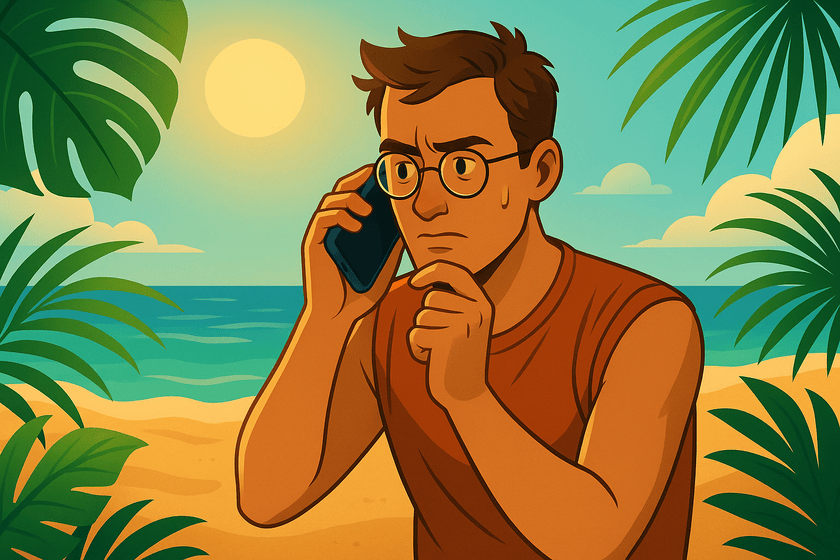

(*AI-generated image*)


#### Twoim celem będzie jest wytrenowanie modeli do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

Poniżej znajdziesz pytania, które mogą być pomocne w zadaniu:

- Czego nauczyło Cię o badanym zbiorze danych poprzednie zadanie? Jak możesz wykorzystać wyciągnięte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych może wpływać na zachowanie modelu?
- Co mój model robi i w jaki sposób?
- Jak nie przetrenować wybranego modelu?
- Jaki wynik klasyfikacji możemy uznać za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, które pomogą Ci w tym. Co było przydatne, a co okazało się bezużyteczne?
- [Nie doprowadź](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stwórz baseline, czyli dla porównania sprawdź jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (jeśli Twój docelowy model radzi sobie gorzej - uciekaj)
- Przeprowadź badania na dwóch wybranych modelach uczenia maszynowego (np. spośród: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdką [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach użyj wybranych metryk. Wybór uzasadnij.
- Dla każdego modelu wybierz co najmniej dwa hiperparametry i przeprowadź badania zależności wyników metryk od wartości hiperparametrów. Zwizualizuj wszystko ładnie, zastanów się dlaczego tak mogło być i wyciągnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Jeśli chcesz, możesz sprawdzić (przyjmując pewne założenia), jakie byłyby Twoje szanse na Titanicu.

Uwaga! Jeśli Titanic to dla Ciebie nic i baaaaardzo chcesz to możesz w ramach tego zadania zająć się [bardziej wymagającym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.

In [8]:
titanic_df = pd.read_csv(base_path / 'titanic_cleaned.csv', index_col='PassengerId')

In [21]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Alone,Embarked_C,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1,1,1,38.000000,1,0,71.2833,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,1,3,1,26.000000,0,0,7.9250,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,1,1,1,35.000000,1,0,53.1000,False,False,False,...,True,False,False,True,False,False,False,False,False,False
5,0,3,0,35.000000,0,0,8.0500,False,True,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,13.0000,False,True,False,...,True,False,False,False,False,False,False,False,False,True
888,1,1,1,19.000000,0,0,30.0000,False,True,False,...,True,False,True,False,False,False,False,False,False,False
889,0,3,1,29.699118,1,2,23.4500,False,False,False,...,True,False,False,False,False,False,False,False,False,True


Względem poprzedniego zadania, zdecydowałem się wyodrębnić sektor i zakodować go jako one-hot. Poza tym usunąłem niepotrzebne kolumny - name oraz ticket. Pozostałe kolumny mogą okazać się przydatne.

In [10]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Child', 'Alone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Cabin_U'],
      dtype='object')

Podzielmy dane na etykiety i dane, oraz dane treningowe i testowe

In [23]:
X, y = titanic_df.drop(columns=['Survived']), titanic_df['Survived']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 0.25, bo danych nie mamy jakoś super dużo

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = DummyClassifier(strategy = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       142
           1       0.36      0.49      0.42        81

    accuracy                           0.50       223
   macro avg       0.50      0.50      0.49       223
weighted avg       0.53      0.50      0.51       223



array([[71, 71],
       [41, 40]])

Jako pierwszy algorytm postanowiłem użyć KNN. Sprawdzimy jak sobie poradzi z metrykami Euklidesową i Cosinusową. (Obstawiałbym że dla Euklidesowej może być sporo parametrów i poradzi sobie gorzej)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X, y)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       142
           1       0.70      0.58      0.64        81

    accuracy                           0.76       223
   macro avg       0.74      0.72      0.73       223
weighted avg       0.75      0.76      0.75       223



array([[122,  20],
       [ 34,  47]])

In [29]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X, y)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       142
           1       0.78      0.74      0.76        81

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



array([[125,  17],
       [ 21,  60]])

Faktycznie, dla 5 sąsiadów Lepiej wyszło w metryce cosinusowej. Zobaczmy jeszcze jak zmienią się metryki przy różnej liczbie sąsiadów.

In [33]:
from matplotlib import pyplot as plt
def simulate_knn(metric):
  x_plot = range(2, 30)
  acc_plot = []
  prec_plot = []
  rec_plot = []
  f1_plot = []
  for n_neighbors in range(2, 30):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    acc_plot.append(accuracy_score(y_test, y_pred))
    prec_plot.append(precision_score(y_test, y_pred))
    rec_plot.append(recall_score(y_test, y_pred))
    f1_plot.append(f1_score(y_test, y_pred))

  plt.plot(x_plot, acc_plot, label='accuracy')
  plt.plot(x_plot, prec_plot, label='precision')
  plt.plot(x_plot, rec_plot, label='recall')
  plt.plot(x_plot, f1_plot, label='f1')
  plt.legend()
  plt.show()


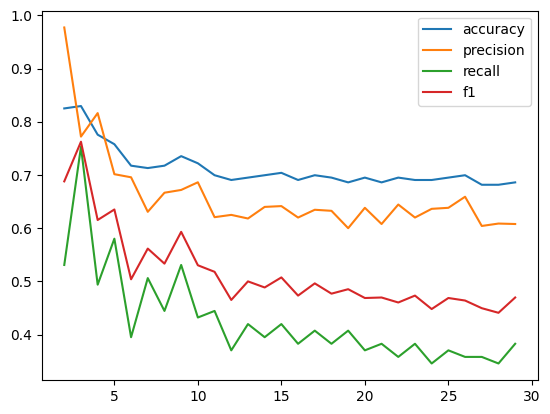

In [34]:
simulate_knn('euclidean')

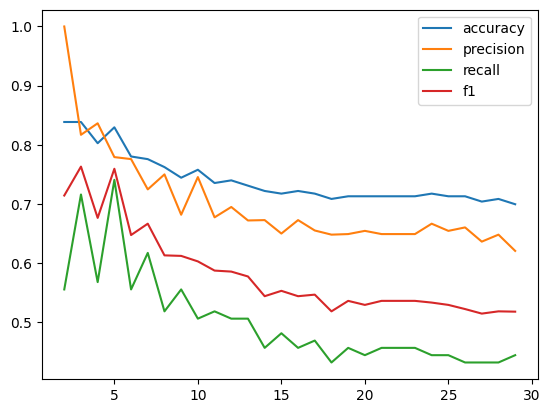

In [35]:
simulate_knn('cosine')

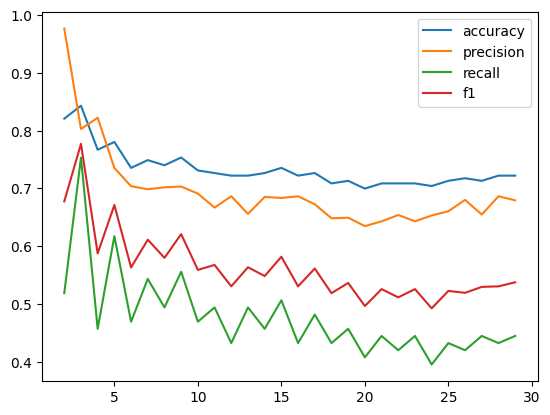

In [36]:
simulate_knn('manhattan')

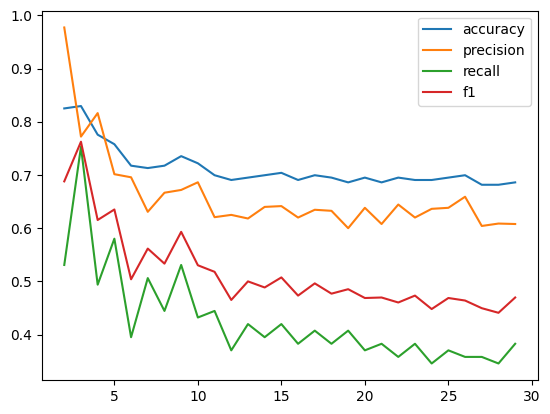

In [38]:
simulate_knn('minkowski')

Widzimy, że dla wszystkich metryk optymalna liczba sąsiadów znajduje się w okolicy 5, natomiast dokładna wartość w każdej metryce jest inna. Ciekawe są te ogromne wahania: np. w minkowski zmniejszymy sąsiadów o 1 i recall spada o 30%.

Drugim algorytmem którego użyję będzie Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       142
           1       0.76      0.42      0.54        81

    accuracy                           0.74       223
   macro avg       0.75      0.67      0.68       223
weighted avg       0.74      0.74      0.72       223



array([[131,  11],
       [ 47,  34]])

Dla takich parametrów, niepokojący jest recall dla 1 (gorszy niż przy dummy). Spróbujmy więc je pozmieniać

In [42]:
def classify_random_forest(n_estimators, max_depth):
  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return  [
      accuracy_score(y_test, y_pred),
      precision_score(y_test, y_pred),
      recall_score(y_test, y_pred),
      f1_score(y_test, y_pred)
           ]

Najpierw zobaczmy jak dobrać głębokość

In [45]:
for i in range(1, 20):
  print(f"Depth {i}: {classify_random_forest(100, i)}")

Depth 1: [0.7085201793721974, 0.7857142857142857, 0.2716049382716049, 0.4036697247706422]
Depth 2: [0.7399103139013453, 0.7555555555555555, 0.41975308641975306, 0.5396825396825397]
Depth 3: [0.7937219730941704, 0.7692307692307693, 0.6172839506172839, 0.684931506849315]
Depth 4: [0.7892376681614349, 0.765625, 0.6049382716049383, 0.6758620689655173]
Depth 5: [0.8026905829596412, 0.7936507936507936, 0.6172839506172839, 0.6944444444444444]
Depth 6: [0.7937219730941704, 0.7692307692307693, 0.6172839506172839, 0.684931506849315]
Depth 7: [0.8026905829596412, 0.7936507936507936, 0.6172839506172839, 0.6944444444444444]
Depth 8: [0.7802690582959642, 0.7352941176470589, 0.6172839506172839, 0.6711409395973155]
Depth 9: [0.7847533632286996, 0.746268656716418, 0.6172839506172839, 0.6756756756756757]
Depth 10: [0.7713004484304933, 0.6973684210526315, 0.654320987654321, 0.6751592356687898]
Depth 11: [0.7623318385650224, 0.6891891891891891, 0.6296296296296297, 0.6580645161290323]
Depth 12: [0.77130044

Głębokość 7 to optimum. Teraz dobierzmy liczbę klasyfikatorów.

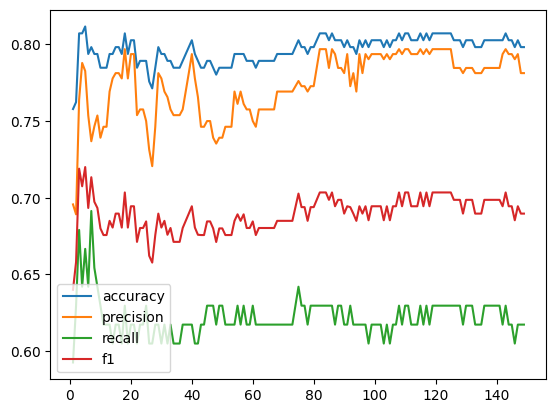

In [46]:
  acc_plot = []
  prec_plot = []
  rec_plot = []
  f1_plot = []
  for n_estimators in range(1, 150):
    acc, prec, rec, f1 = classify_random_forest(n_estimators, 7)
    acc_plot.append(acc)
    prec_plot.append(prec)
    rec_plot.append(rec)
    f1_plot.append(f1)

  plt.plot(range(1, 150), acc_plot, label='accuracy')
  plt.plot(range(1, 150), prec_plot, label='precision')
  plt.plot(range(1, 150), rec_plot, label='recall')
  plt.plot(range(1, 150), f1_plot, label='f1')
  plt.legend()
  plt.show()

Najlepiej wychodzi dla ok. 90 klasyfikatorów, ale różnice nie są tak duże jak np. w knn

Podsumowanie: Oba modele są w stanie klasyfikować dane titanica sensownie (lepiej niż dummy), jeśli dobierzemy odpowiednio parametry. Jeśli chciałoby się jeszcze bardziej podbić metryki, możnaby spróbować wyciągnąć więcej z danych, ale popróbować jescze innych, bardzie zaawansowanych modeli jak sieci neuronowe. Mimo tego, dokładność i precyzja na poziomie 70-80% uważam za dosyć dobry wynik.